 Breast Cancer Classification using K-Nearest Neighbors (KNN)

This project focuses on building a predictive machine learning model to classify breast mass tumors as either Malignant (0) or Benign (1). By analyzing clinical data from the Breast Cancer Wisconsin Diagnostic dataset, the model assists in automating the early detection of oncology patterns.

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()


In [3]:
print(cancer.keys()) #To shows the "folders" available in the data

# This function returns the number of features of the breast cancer dataset,which is an integer. 
print(len(cancer['feature_names']))


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
30


In [4]:
# Convert the sklearn.dataset `cancer` to a DataFrame. 

cancerdf = pd.DataFrame(
    data=np.c_[cancer.data, cancer.target],
    columns=list(cancer.feature_names) + ['target'])
print(cancerdf)



     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [5]:

# Series return named `target` of length 2 with integer values and index =`['malignant', 'benign']`
series = cancerdf['target'].value_counts() 
series.index = ['benign', 'malignant']
print(series)


benign       357
malignant    212
Name: count, dtype: int64


In [6]:

# Split the DataFrame into `X` (the data (feature)  ) and `y` (the labels).


x = cancerdf.iloc[:, 0:30]
y = cancerdf['target']

print("X shape =", x.shape)
print("y shape =", y.shape)

print("\n--- X Data ---")
print(x.head())


print("\n--- y Labels ---")
print(y.head())


X shape = (569, 30)
y shape = (569,)

--- X Data ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst r

In [7]:
from sklearn.model_selection import train_test_split

# split `X` and `y` into training and test sets (X_train, X_test, y_train, and y_test)

X_train, X_test,y_train, y_test = train_test_split(x, y, random_state=0)
print (X_train.shape , X_test.shape ,y_train.shape , y_test.shape)


(426, 30) (143, 30) (426,) (143,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` 
# and using one nearest neighbor (`n_neighbors = 5`).

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [9]:

# Using your knn classifier, predict the class label using the mean value for each feature.

means = cancerdf.mean()[:-1].values.reshape(1, -1)
knn.predict(means )

/Users/anasaljohani/opt/anaconda3/envs/autoavsr/lib/python3.8/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


array([1.])

In [10]:
#Using your knn classifier, predict the class labels for the test set `X_test`.

y_pred=knn.predict(X_test)

In [11]:

#Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("Training Score:", train_score)
print("Test Score:", test_score)

Training Score: 0.9389671361502347
Test Score: 0.9440559440559441


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[49  4]
 [ 4 86]]

Detailed Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        53
         1.0       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



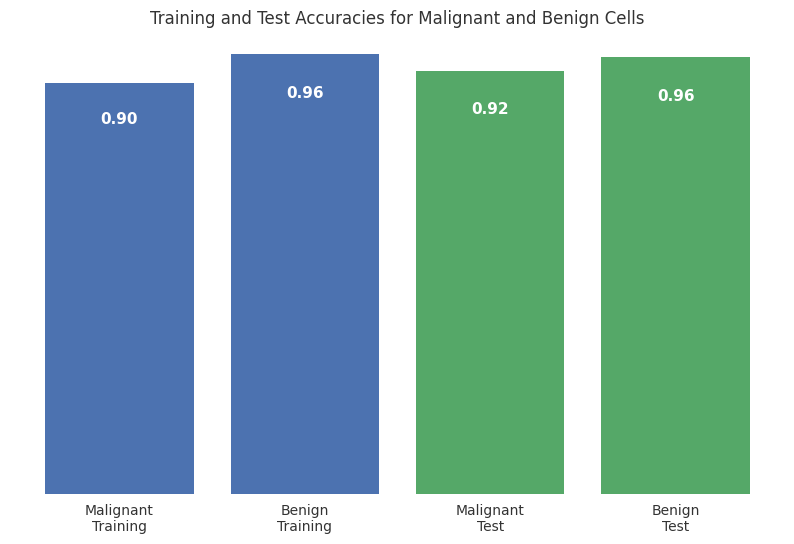

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset based on class (Malignant=0, Benign=1) for granular evaluation
mal_train_X = X_train[y_train == 0]
mal_train_y = y_train[y_train == 0]
ben_train_X = X_train[y_train == 1]
ben_train_y = y_train[y_train == 1]

mal_test_X = X_test[y_test == 0]
mal_test_y = y_test[y_test == 0]
ben_test_X = X_test[y_test == 1]
ben_test_y = y_test[y_test == 1]

# Calculate accuracy scores for each class separately
scores = [knn.score(mal_train_X, mal_train_y), 
          knn.score(ben_train_X, ben_train_y), 
          knn.score(mal_test_X, mal_test_y), 
          knn.score(ben_test_X, ben_test_y)]

# --- Visualization ---
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# Add text labels on top of bars and remove chart spines for a cleaner look
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*0.90, 
                 '{0:.2f}'.format(height), 
                 ha='center', color='w', fontsize=11, fontweight='bold')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add title and axis labels
plt.xticks([0, 1, 2, 3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8)
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

# Export the figure as a high-quality PNG for documentation
plt.savefig('accuracy_chart.png', dpi=300, bbox_inches='tight')

plt.show()